<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#Using Machine Learning to predict sales.
Without proper sales forecasting, many business decisions are based on unreliable estimates or instinct – which leads to many inefficiencies and missed opportunities. with forecating we can answer Questions like.
* How much stock should be ordered? 
* How much revenue can be expected in upcoming Year.? 

**What is sales forecasting?**

A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts… etc.

#Import Important Libraries.

In [1]:
#Import numpy with alias np
import numpy as np
#Import pandas with alias pd
import pandas as pd
#Import seaborn with alias sns
import seaborn as sns
#Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection



#Data Import

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [7]:
#Data set csv Files location. 
File1="/content/drive/MyDrive/AlmaBetter/Alma better Projects/Supervised ML-Regression/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/AlmaBetter/Alma better Projects/Supervised ML-Regression/Copy of store.csv"

**Importing Data set.**

In [102]:
#Load Rossmann store Data set.
df0=pd.read_csv(File1)
#Load store Data set.
df1=pd.read_csv(File2)

#Understanding Data sets.

In [104]:

print("(Rows, Columns)=",df0.shape)
df0.head()



(Rows, Columns)= (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [105]:
print("(Rows, Columns)=",df1.shape)
df1.head()

(Rows, Columns)= (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [106]:
df0.info()
print("\n")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Asso

In [107]:
df0.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [108]:
df1.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [109]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
  info = pd.DataFrame(index=DataFrame.columns)
  info['dtype'] = DataFrame.dtypes
  info['Unique'] = DataFrame.nunique()
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
  info['Num_nonNullValues'] = DataFrame.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(DataFrame) * 100
  return info
Detailed_info(df0)



,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
Store,int64,1115,0,1017209,0.0
DayOfWeek,int64,7,0,1017209,0.0
Date,object,942,0,1017209,0.0
Sales,int64,21734,0,1017209,0.0
Customers,int64,4086,0,1017209,0.0
Open,int64,2,0,1017209,0.0
Promo,int64,2,0,1017209,0.0
StateHoliday,object,5,0,1017209,0.0
SchoolHoliday,int64,2,0,1017209,0.0


In [110]:
Detailed_info(df1)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
Store,int64,1115,0,1115,0.000000
StoreType,object,4,0,1115,0.000000
Assortment,object,3,0,1115,0.000000
CompetitionDistance,float64,654,3,1112,0.269058
CompetitionOpenSinceMonth,float64,12,354,761,31.748879
CompetitionOpenSinceYear,float64,23,354,761,31.748879
Promo2,int64,2,0,1115,0.000000
Promo2SinceWeek,float64,24,544,571,48.789238
Promo2SinceYear,float64,7,544,571,48.789238
PromoInterval,object,3,544,571,48.789238


#Feature Transformation
* Missing Value Imputation.
* Feature scaling.
* Outlier Detection

**1** **Rossman DataSet**

**Date**
* Extract features like Day of week, week number,month and year from the date feature. 

In [111]:
#Convert Date into pandas Date time Object.
df0["Date"]=df0["Date"].apply(lambda x:pd.to_datetime(x))



In [112]:
#Extract Days, week_Number, Month, Year from Date which we can further use in our Exploration.
df0['Week_Number'] = df0['Date'].dt.strftime('%U')

df0['Day'] = df0['Date'].dt.day

df0['Month'] = df0['Date'].dt.month
df0['Year'] = df0['Date'].dt.year

#Drop Date feature as now it is not much useful.
df0.drop(['Date'], axis='columns', inplace=True)



In [113]:
df0.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year
0,1,5,5263,555,1,1,0,1,30,31,7,2015
1,2,5,6064,625,1,1,0,1,30,31,7,2015
2,3,5,8314,821,1,1,0,1,30,31,7,2015
3,4,5,13995,1498,1,1,0,1,30,31,7,2015
4,5,5,4822,559,1,1,0,1,30,31,7,2015


**StateHoliday**

In [114]:
print(df0["StateHoliday"].unique())


['0' 'a' 'b' 'c' 0]


*Convert string a,b,c which represent different holidays into 1 as it also represents a Holiday.*

In [115]:
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

df0["StateHoliday"] = df0["StateHoliday"].apply(pd.to_numeric, errors='coerce')

In [116]:

df0["StateHoliday"].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

**2nd Data set:-** **Store Data Set**

In [117]:
print("(Rows, Columns)=",df1.shape)
print(df1.info())
df1.sample(5)



(Rows, Columns)= (1115, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
20,21,c,c,550.0,10.0,1999.0,1,45.0,2009.0,"Jan,Apr,Jul,Oct"
288,289,d,a,6540.0,12.0,2007.0,0,NaN,NaN,NaN
668,669,d,a,17080.0,7.0,2012.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
115,116,a,a,680.0,4.0,2013.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


**Handling the Missing Value**

* Fill CompetitionDistance with max value.

* Fill CompetitionOpenSinceMonth & CompetitionOpenSinceYear with mode.
* Drope Promo2SinceWeek ,Promo2SinceYear , PromoInterval as  they have huge nulls in them.

In [118]:

df1.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis='columns', inplace=True)
df1['CompetitionDistance'] = df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].max())
df1['CompetitionOpenSinceMonth'] = df1['CompetitionOpenSinceMonth'].fillna(df1['CompetitionOpenSinceMonth'].mode().iloc[0])
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].fillna(df1['CompetitionOpenSinceYear'].mode().iloc[0])

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 61.1+ KB


In [120]:
df1.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5594.466368,7.788341,2010.043946,0.512108
std,322.01708,8479.266802,2.779130,5.500844,0.500078
min,1.00000,20.000000,1.000000,1900.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000
50%,558.00000,2330.000000,9.000000,2012.000000,1.000000
75%,836.50000,6905.000000,9.000000,2013.000000,1.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000


**Handling outliers**

Start with our target variable as it is the most important variable.

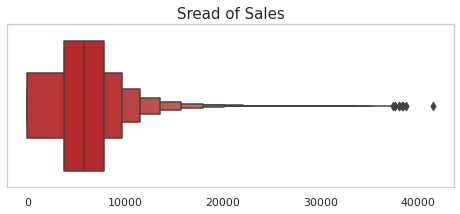

In [121]:
sns.set_theme(rc={'figure.figsize': (8,3)},style='whitegrid')
sns.boxenplot(x=df0['Sales'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Sread of Sales',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

**Observation:-**We can clearly visualize that Sales above 25000 is very less in percentage. lets explore more to validate our assumption.

In [122]:
#Rows with Sales above 25k
df_mask=df0['Sales']>=25000
filtered_df = df0[df_mask]
filtered_df


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year
261,262,5,25774,3669,1,1,0,1,30,31,7,2015
755,756,5,25280,2901,1,1,0,1,30,31,7,2015
1113,1114,5,27508,3745,1,1,0,1,30,31,7,2015
3343,1114,3,25840,3545,1,1,0,1,30,29,7,2015
4458,1114,2,25518,3456,1,1,0,1,30,28,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1009106,817,2,28050,3862,1,1,0,0,01,8,1,2013
1010192,788,1,26008,2270,1,1,0,0,01,7,1,2013
1010221,817,1,32263,4065,1,1,0,0,01,7,1,2013
1010516,1112,1,25165,1661,1,1,0,0,01,7,1,2013


In [123]:
# Percentage of Outliers 
zero_sales = df0.loc[df0['Sales']==0]

sales_greater_than_25k = df0.loc[df0['Sales'] > 25000]

print('Length of the dataset:', len(df0))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(df0))*100))
print('Percentage of sales greater than 25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(df0))*100))

Length of the dataset: 1017209
Percentage of Zeros in dataset: 16.995%
Percentage of sales greater than 25k in dataset: 0.075% 


**Obervation:-**
We can drop the sales datapoints which are greater than 25k as they are very less percentage of the dataset and are probably outliers.


**Drop Outliers**


In [124]:
#Drop sales value above 25000
df0.drop(df0.loc[df0['Sales'] > 25000].index,inplace=True)

**Customers**
* check for any outliers in customers data and if any then handle those outliers.

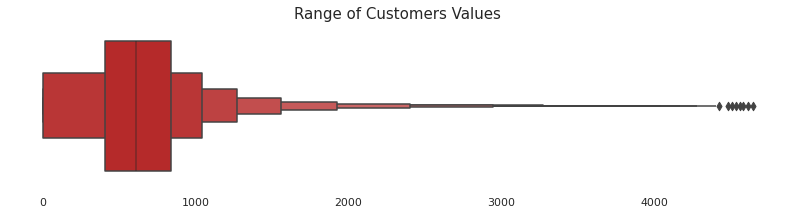

In [125]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df0['Customers'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

In [126]:
#Customers above 2500
df_mask=df0['Customers']>=2500
filtered_df = df0[df_mask]
filtered_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year
250,251,5,22205,2508,1,1,0,1,30,31,7,2015
258,259,5,14096,2628,1,1,0,1,30,31,7,2015
334,335,5,17867,2592,1,1,0,1,30,31,7,2015
561,562,5,20303,3255,1,1,0,1,30,31,7,2015
585,586,5,17879,2501,1,1,0,1,30,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1015241,262,3,16964,3113,1,0,0,1,00,2,1,2013
1015541,562,3,15472,2744,1,0,0,1,00,2,1,2013
1015712,733,3,12477,3121,1,0,0,1,00,2,1,2013
1016093,1114,3,20642,3401,1,0,0,1,00,2,1,2013


In [127]:
# Percentage of Outliers in customers section.
zero_Customers = df0.loc[df0['Customers']==0]

Customers_More_than_2500 = df0.loc[df0['Customers'] > 2500]

print('Length of the dataset:', len(df0))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(df0))*100))
print('Percentage of Customers more than 2500 in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(df0))*100))

Length of the dataset: 1016451
Percentage of Zeros in dataset: 17.007%
Percentage of Customers more than 2500 in dataset: 0.075% 


**Obervation:-**We can drop the Customers datapoints which are greater than 2500 as they are very less percentage of the dataset and are probably outliers.

**Drop Outliers**

In [128]:
#Drop Cutomers value above 2500
df0.drop(df0.loc[df0['Customers'] > 2500].index,inplace=True)

**Scatter plot between customer and sales**

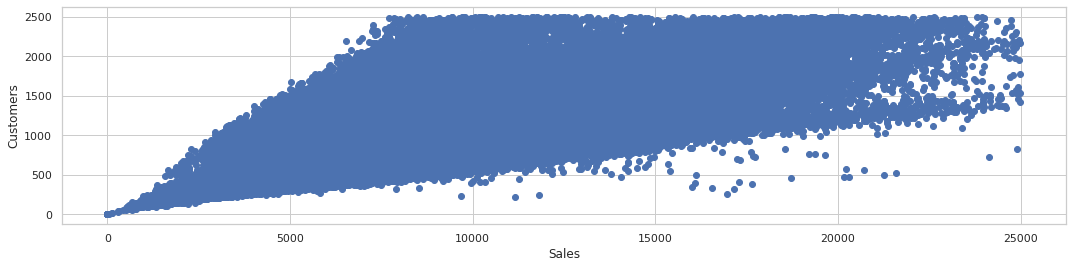

In [129]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,4))
ax.scatter(df0['Sales'], df0['Customers'])
 
# x-axis label
ax.set_xlabel('Sales')
 
# y-axis label
ax.set_ylabel('Customers')
plt.show()

In [130]:
df1.head()
df1.shape

(1115, 7)

**CompetitionOpenSinceYear**
* Check for outliers 
* fill NaN with mode

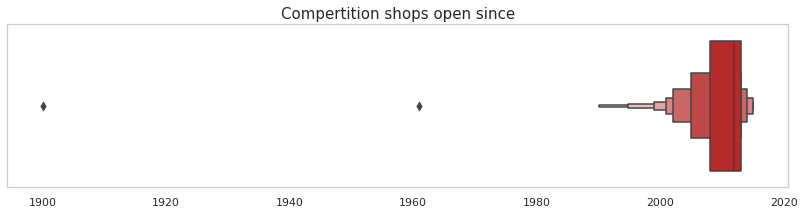

In [131]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionOpenSinceYear'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Compertition shops open since',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

In [132]:
#Drop Cutomers value above 2500
df1.drop(df1.loc[df1['CompetitionOpenSinceYear'] < 1980].index,inplace=True)

In [133]:
df1["CompetitionOpenSinceYear"].isnull().sum()

0

In [134]:
df1["CompetitionOpenSinceYear"].fillna(int(df1["CompetitionOpenSinceYear"].mode()),inplace=True)

**Competition open since after removal of outliers**

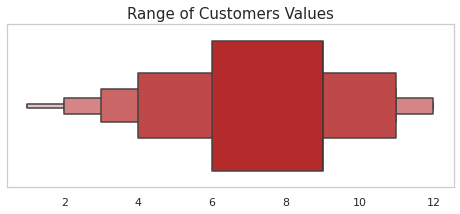

In [135]:
sns.set_theme(rc={'figure.figsize': (8,3)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionOpenSinceMonth'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

**Competition shops Distance from Rossman stores**
* check for ouliers
* Fill NaN with median

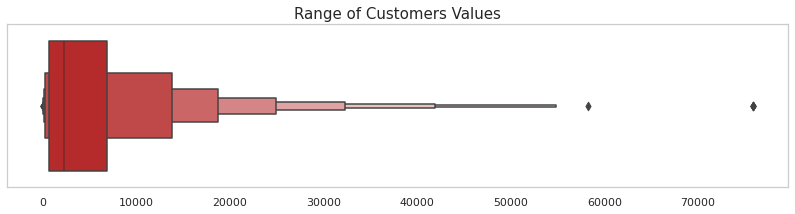

In [136]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionDistance'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

In [137]:
df1["CompetitionDistance"].isnull().sum()

0

In [138]:
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(),inplace=True)

#**EDA With Data Visualization**

#Feature Engineering after Merging Data sets on store

In [139]:
df1.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [140]:
df0.isna().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Week_Number      0
Day              0
Month            0
Year             0
dtype: int64

In [142]:
df= df0.merge(df1 , on='Store' , how='right')
print(df.shape)

(1007776, 18)


In [143]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Week_Number                  0
Day                          0
Month                        0
Year                         0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [ ]:
df.CompetitionDistance=df.

In [33]:
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,5263,555,1,1,0,1,30,31,7,2015,c,a,1270.0,9.0,2008.0,0.0
1,2,5,6064,625,1,1,0,1,30,31,7,2015,a,a,570.0,11.0,2007.0,1.0
2,3,5,8314,821,1,1,0,1,30,31,7,2015,a,a,14130.0,12.0,2006.0,1.0
3,4,5,13995,1498,1,1,0,1,30,31,7,2015,c,c,620.0,9.0,2009.0,0.0
4,5,5,4822,559,1,1,0,1,30,31,7,2015,a,a,29910.0,4.0,2015.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009471,1111,2,0,0,0,0,1,1,00,1,1,2013,a,a,1900.0,6.0,2014.0,1.0
1009472,1112,2,0,0,0,0,1,1,00,1,1,2013,c,c,1880.0,4.0,2006.0,0.0
1009473,1113,2,0,0,0,0,1,1,00,1,1,2013,a,c,9260.0,9.0,2013.0,0.0
1009474,1114,2,0,0,0,0,1,1,00,1,1,2013,a,c,870.0,9.0,2013.0,0.0


**1** **Sales**

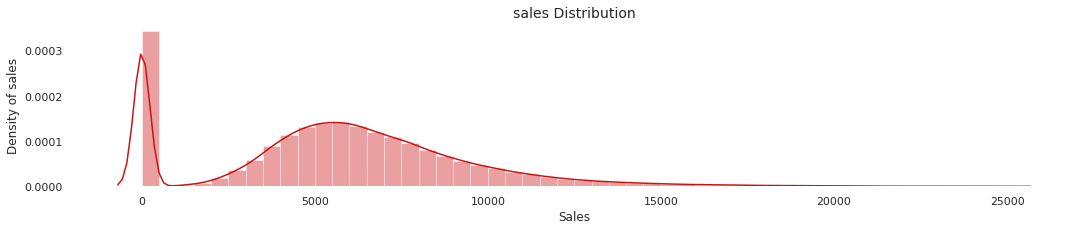

In [144]:
#Distribution of Sales
sns.set_theme(palette='autumn',rc={'figure.figsize': (18,3)},style='whitegrid')
sns.distplot(x=df0['Sales'],color='#CC1313')
plt.title('sales Distribution',size=14)
plt.ylabel('Density of sales',size=12)
plt.xlabel('Sales',size=12)
plt.grid(False)
for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.show()  

**Observation:-**Lots of zero sales is disturbing our Target Variable.
When stores are closed the sales value is zero hence we have deal with the zero sales.

**Some exceptional cases**
* Looking for a scenerio where the Stores are open and yet there is no sales on that .
* Looking for a scenerio where the Stores are close and yet there sales on that day

In [145]:
No_Sales=df.loc[(df['Sales']==0) & (df['Open'] == 1) & (df['StateHoliday'] == 0) 
                               & (df['SchoolHoliday'] == 0)]
print(No_Sales.shape)
No_Sales.head()

(42, 18)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
22587,25,4,0,0,1,0,0,0,06,13,2,2014,c,a,430.0,4.0,2003.0,0
22588,25,3,0,0,1,0,0,0,06,12,2,2014,c,a,430.0,4.0,2003.0,0
25208,28,4,0,0,1,1,0,0,35,4,9,2014,a,a,1200.0,10.0,2014.0,1
51486,57,2,0,0,1,1,0,0,26,1,7,2014,d,c,420.0,6.0,2014.0,0
92571,102,6,0,0,1,0,0,0,27,12,7,2014,a,a,150.0,12.0,2007.0,1


In [146]:
Sales_Closed=df.loc[(df['Sales']<0) & (df['Open'] == 0)]
print(Sales_Closed.shape)
# No_Sales.head()

(0, 18)


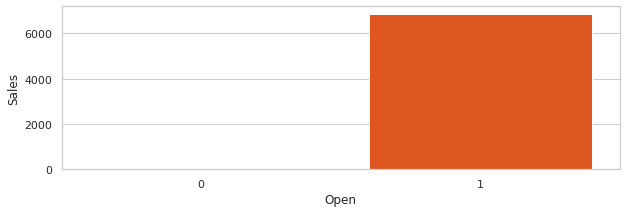

In [147]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,3)},style='whitegrid')
sns.barplot(x = 'Open',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

**conclusion:-**
* When stores are closed there is no relation hence remove rows when stores are closed.
*  where there is no record of sales even without any holidays. We can remove these data points too as they are an exceptional case
* Further we can also remove the open column from or Data set.

In [148]:
import warnings
warnings.filterwarnings("ignore")
df=df[df.Open != 0]
#drop rows which have sales=0 when store is open and 
df.drop(df.loc[(df['Sales']==0) & (df['Open'] == 1)& (df['StateHoliday'] == 0) & (df['SchoolHoliday'] == 0)].index,inplace=True)
print(df.shape)

(835216, 18)


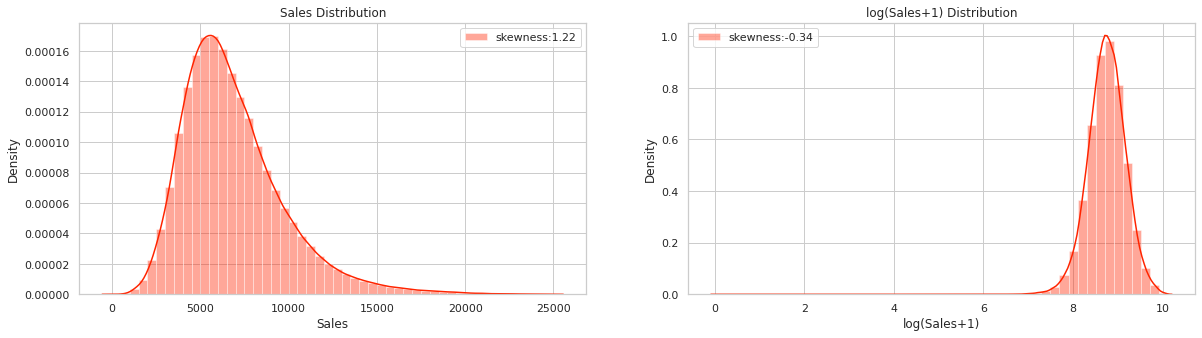

In [149]:
#Compare Distribution of Sales withot and with log tranformation after cleaning it.
import warnings
warnings.filterwarnings("ignore")


fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df['Sales'],hist = True,label='skewness:{:.2f}'.format(df['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(df['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

**Conclusion:-**
* Great! Oue Target variable is ready to train and test.

**2** **Days of Week**

In [150]:
df.DayOfWeek.value_counts()

6    142804
2    142538
3    140609
5    137223
1    135825
4    133316
7      2901
Name: DayOfWeek, dtype: int64

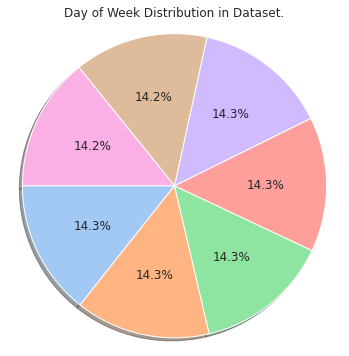

In [151]:
#Affect on Sales during different Day of week

sizes = df0.DayOfWeek.value_counts()
colors = sns.color_palette('pastel')
explode = (0.1, 0.0)
plt.pie(sizes,colors=colors,
        autopct='%1.1f%%',shadow=True, startangle=180)
plt.axis('equal')
plt.title("Day of Week Distribution in Dataset.")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Observation:-** 
* Sundays percentage is reduced highly due to removal of Closed and slaes == zero. 
* This could creat an unbalance in our feature DayOfWeek.

**Affect of Days Of Week over Sales** 

In [152]:
Sales_on_Dayofweek=df.groupby(['DayOfWeek'])[['Sales']].sum()
Sales_on_Dayofweek

,Sales
DayOfWeek,
1,1097995398
2,997302011
3,934382247
4,890438950
5,957752417
6,827335422
7,17245825


In [153]:
df.groupby(['DayOfWeek'])[['Sales']].count()

,Sales
DayOfWeek,
1,135825
2,142538
3,140609
4,133316
5,137223
6,142804
7,2901


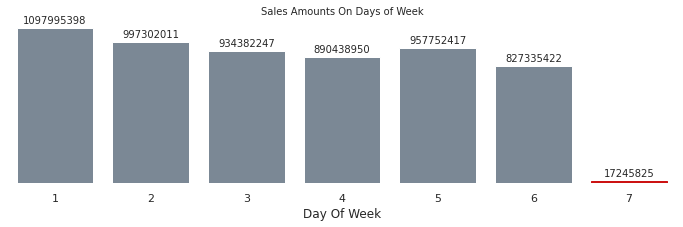

In [154]:
#Groupby Content Rating count the apps sort in decending order.
Sales_df = df.groupby('DayOfWeek').agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,3)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Sales_df['DayOfWeek'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[6].set_color('#CC1313')
#Title
plt.title('Sales Amounts On Days of Week',size=10)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Obsevation:-**
* Monday(1) and Friday(5) have highest sales.
* Sundays have minimum Sales compared to all the other days.

**3** **Customers**

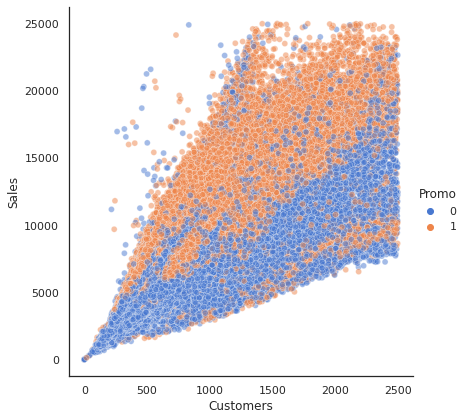

In [155]:
sns.set_theme(style="white")

# # Load the example mpg dataset
# mpg = sns.load_dataset("")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Customers", y="Sales", hue="Promo",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

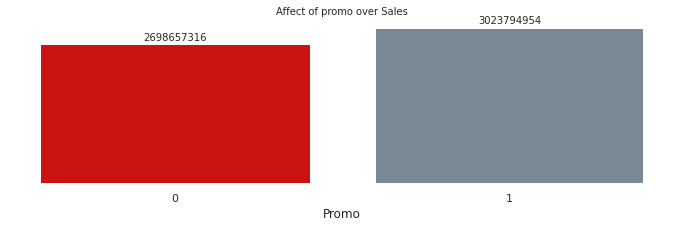

In [156]:
Sales_df = df.groupby('Promo').agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,3)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Sales_df['Promo'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[0].set_color('#CC1313')
#Title
plt.title('Affect of promo over Sales',size=10)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Promo')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Observation:-** 
* Promos atrract customers more.
* sales have impact due to customers.

**4** **State Holiday**

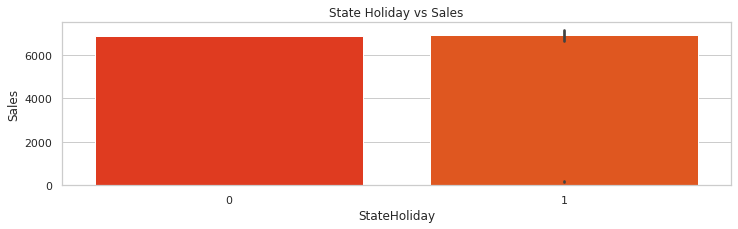

In [157]:
sns.barplot(x='StateHoliday', y='Sales', data=df0).set(title='State Holiday vs Sales')
sns.barplot(x='StateHoliday', y='Sales', data=df).set(title='State Holiday vs Sales')
plt.show()

**5** **School Holiday**

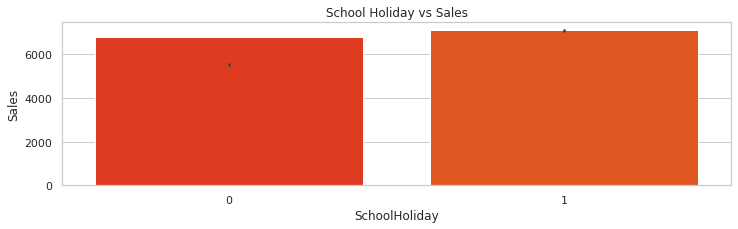

In [158]:
sns.barplot(x='SchoolHoliday', y='Sales', data=df0).set(title='School Holiday vs Sales')
sns.barplot(x='SchoolHoliday', y='Sales', data=df).set(title= 'School Holiday vs Sales')
plt.show()

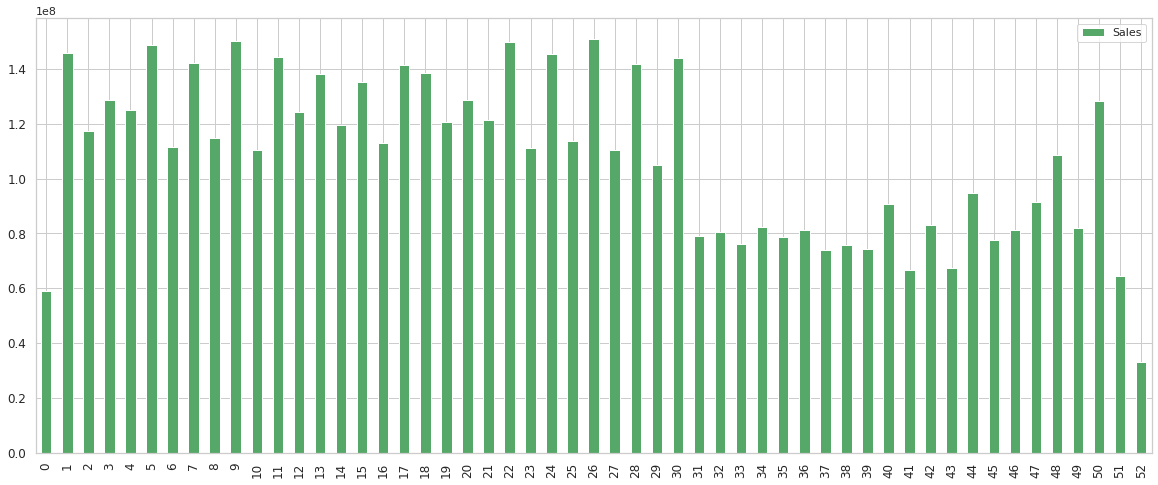

In [159]:
Sales_vs_week=df.groupby(["Week_Number"]).agg({"Sales":"sum"}).reset_index().sort_values('Week_Number',ascending=True)
Sales_vs_week.plot.bar(figsize = (20,8),color="g",fontsize=12)
plt.show()

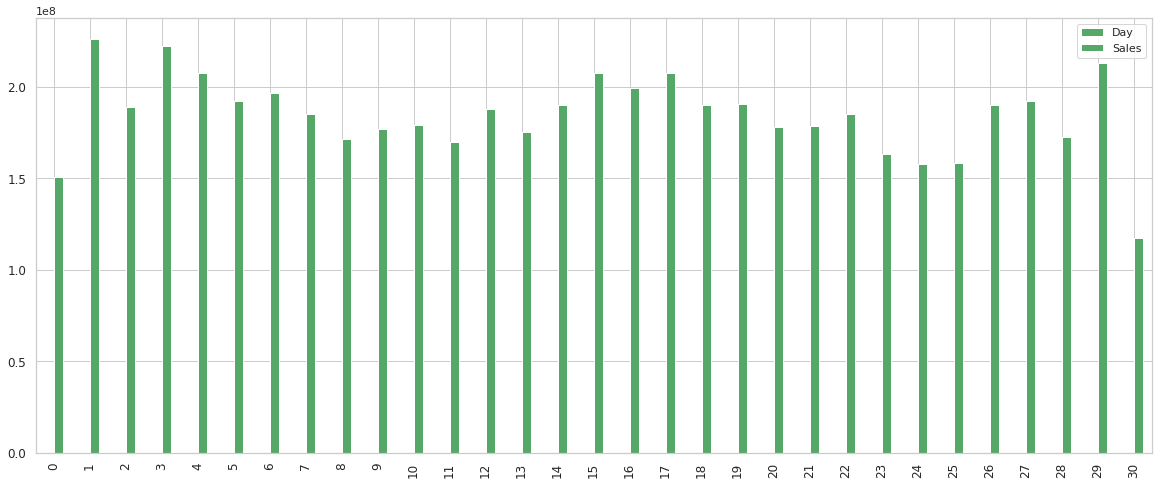

In [160]:
Sales_vs_week=df.groupby(["Day"]).agg({"Sales":"sum"}).reset_index().sort_values('Day',ascending=True)
Sales_vs_week.plot.bar(figsize = (20,8),color="g",fontsize=12)
plt.show()

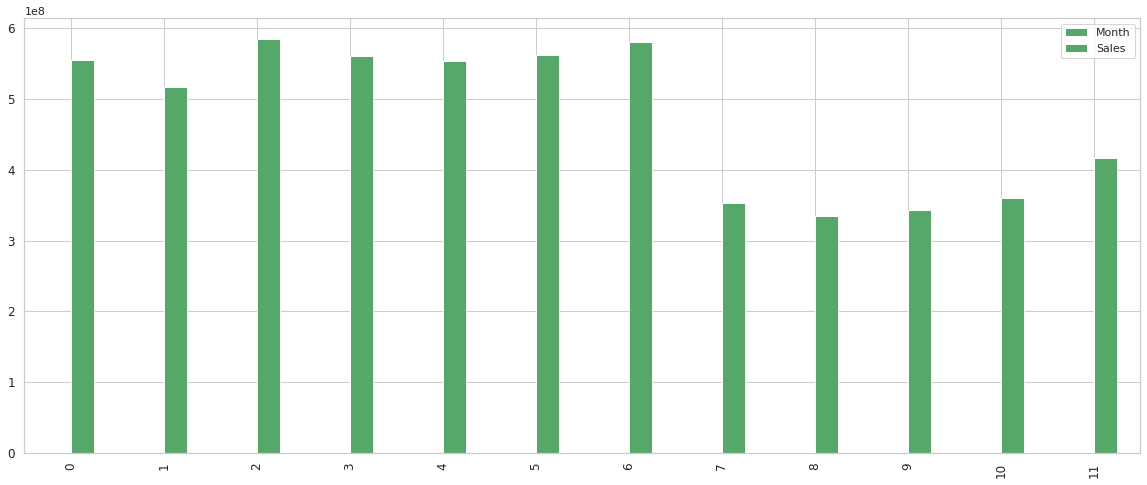

In [161]:
Sales_vs_week=df.groupby(["Month"]).agg({"Sales":"sum"}).reset_index().sort_values('Month',ascending=True)
Sales_vs_week.plot.bar(figsize = (20,8),color="g",fontsize=12)
plt.show()

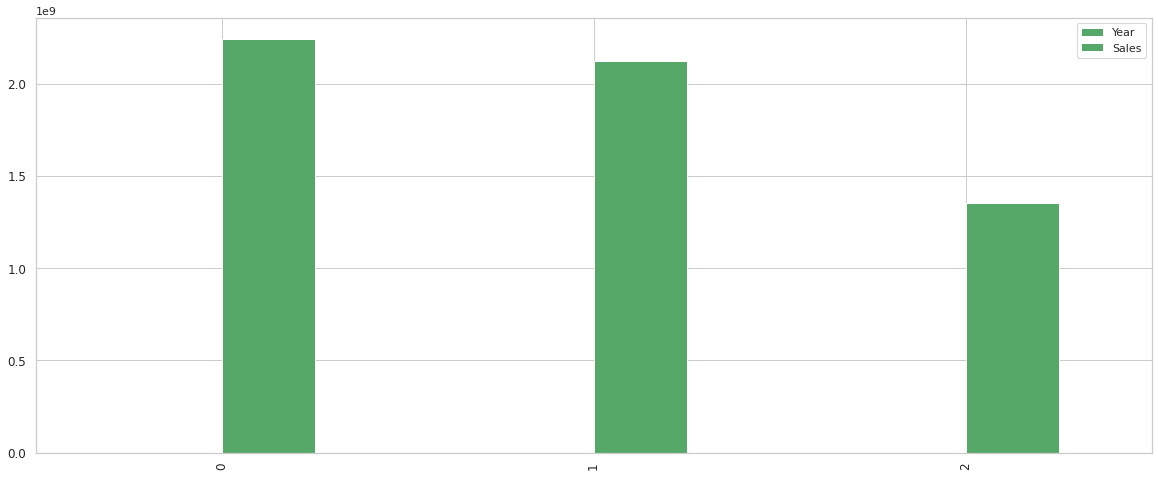

In [162]:
Sales_vs_week=df.groupby(["Year"]).agg({"Sales":"sum"}).reset_index().sort_values('Year',ascending=True)
Sales_vs_week.plot.bar(figsize = (20,8),color="g",fontsize=12)
plt.show()

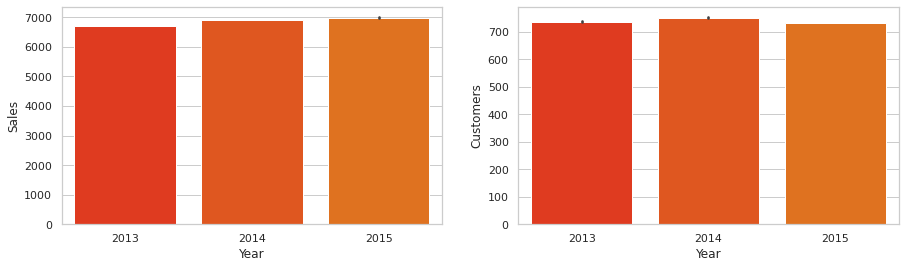

In [163]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=df, ax=axis1)
sns.barplot(x='Year', y='Customers', data=df, ax=axis2)


In [164]:
Sales_df = df.groupby(["Promo","Assortment"]).agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
Sales_df

,Promo,Assortment,Sales
4,1,b,13836611
1,0,b,23868993
2,0,c,1331608449
0,0,a,1343179874
5,1,c,1461786744
3,1,a,1548171599


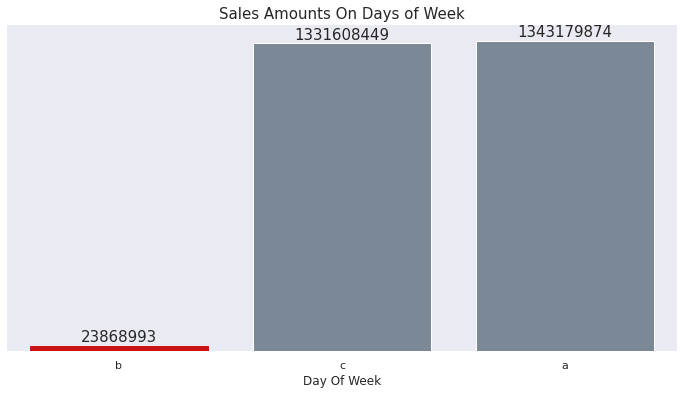

In [165]:
assortment_df = df.groupby(['Assortment']).agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(rc={'figure.figsize':(12,6)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=assortment_df['Assortment'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[0].set_color('#CC1313')
#Title
plt.title('Sales Amounts On Days of Week',size=15)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

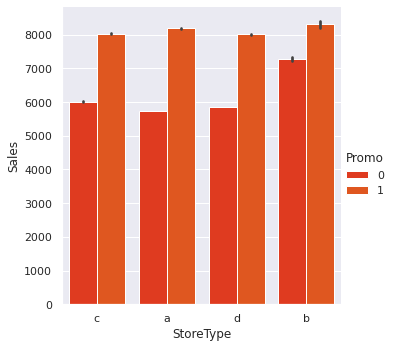

In [166]:
sns.factorplot("StoreType", "Sales", hue="Promo", data=df, kind="bar")

**Assortment**

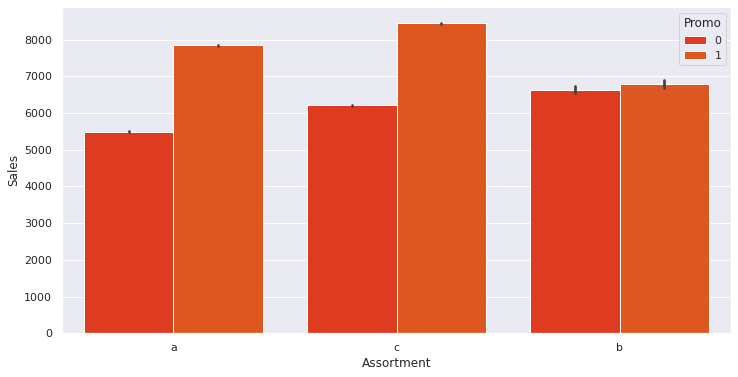

In [167]:
sns.barplot(x = 'Assortment',y = 'Sales',hue="Promo", data = df)
 
# Show the plot
plt.show()

Assortment has a higher edge over promo.

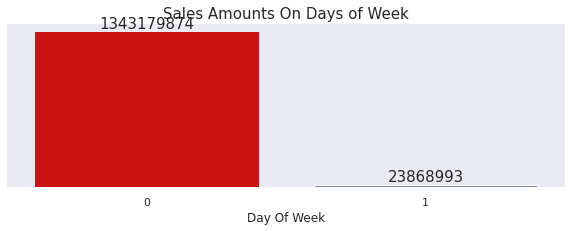

In [168]:
Promo_df = df.groupby(['Promo']).agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(rc={'figure.figsize':(10,3)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Promo_df['Promo'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[0].set_color('#CC1313')
#Title
plt.title('Sales Amounts On Days of Week',size=15)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [169]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Week_Number', 'Day', 'Month', 'Year',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

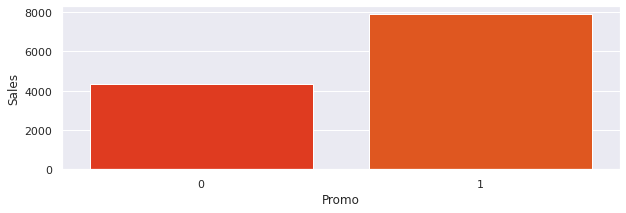

In [170]:
sns.set_theme(rc={'figure.figsize':(10,3)},palette='autumn')
sns.barplot(x = 'Promo',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

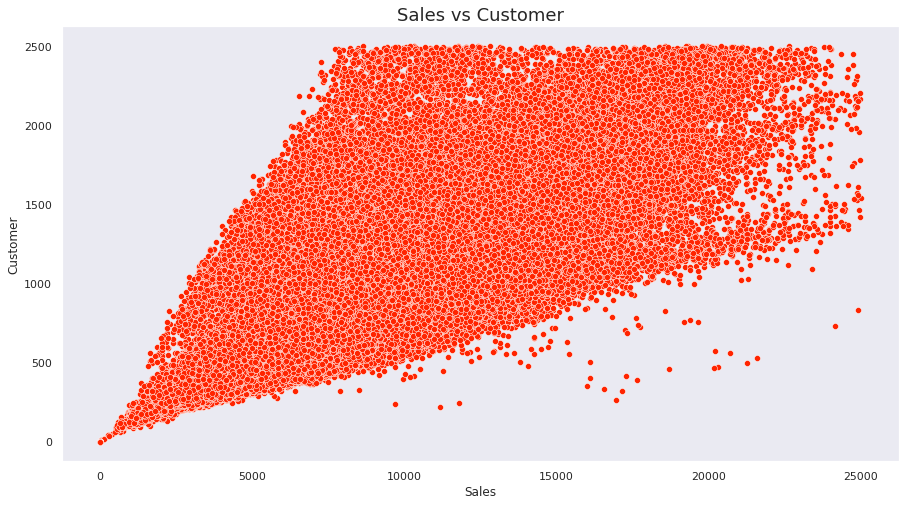

In [171]:
plt.subplots(figsize=(15,8));
sns.scatterplot(df0["Sales"],df0["Customers"],data=df0)
plt.title('Sales vs Customer',fontsize=18)
plt.grid(False)
plt.xlabel("Sales",fontsize=12)
plt.ylabel("Customer",fontsize=12)
plt.show()


##Feature Engineering
**One Hot Encoding for the storeType and Assortment**

In [172]:
# encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['StoreType'] = label_encoder.fit_transform(df['StoreType'])
df['Assortment'] = label_encoder.fit_transform(df['Assortment'])



In [173]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,5263,555,1,1,0,1,30,31,7,2015,2,0,1270.0,9.0,2008.0,0
1,1,4,5020,546,1,1,0,1,30,30,7,2015,2,0,1270.0,9.0,2008.0,0
2,1,3,4782,523,1,1,0,1,30,29,7,2015,2,0,1270.0,9.0,2008.0,0
3,1,2,5011,560,1,1,0,1,30,28,7,2015,2,0,1270.0,9.0,2008.0,0
4,1,1,6102,612,1,1,0,1,30,27,7,2015,2,0,1270.0,9.0,2008.0,0


In [64]:
# df=pd.get_dummies(df, columns = ['StoreType',	'Assortment'])

##Independent Variable Selection.


In [182]:
select_df=df[['DayOfWeek', 'Sales', 'Customers', 'Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceYear', 'Promo2',  'Year', 'Month','Week_Number',
                     'StoreType'
]]

In [183]:
select_df.shape

(835216, 12)

In [185]:
# Correlation
corrl = select_df.corr()
corrl

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Year,Month,StoreType
DayOfWeek,1.000000,-0.194467,-0.125993,-0.288131,-0.138944,0.005399,0.002123,-0.002531,0.001941,-0.019656,-0.002145
Sales,-0.194467,1.000000,0.823348,0.393166,0.041559,-0.026709,0.027511,-0.115036,0.039332,0.073236,-0.001251
Customers,-0.125993,0.823348,1.000000,0.219417,0.031740,-0.140844,0.020730,-0.209360,-0.002390,0.057285,-0.211955
Promo,-0.288131,0.393166,0.219417,1.000000,0.028914,-0.001783,-0.001139,-0.000343,0.024064,-0.006490,0.000839
SchoolHoliday,-0.138944,0.041559,0.031740,0.028914,1.000000,-0.004391,-0.000621,-0.008319,-0.038807,0.118916,-0.002315
CompetitionDistance,0.005399,-0.026709,-0.140844,-0.001783,-0.004391,1.000000,0.032831,-0.141704,0.000590,0.003026,0.076648
CompetitionOpenSinceYear,0.002123,0.027511,0.020730,-0.001139,-0.000621,0.032831,1.000000,-0.000886,0.000259,0.000326,0.052791
Promo2,-0.002531,-0.115036,-0.209360,-0.000343,-0.008319,-0.141704,-0.000886,1.000000,-0.005552,-0.025326,0.087050
Year,0.001941,0.039332,-0.002390,0.024064,-0.038807,0.000590,0.000259,-0.005552,1.000000,-0.268588,-0.001565
Month,-0.019656,0.073236,0.057285,-0.006490,0.118916,0.003026,0.000326,-0.025326,-0.268588,1.000000,-0.007339


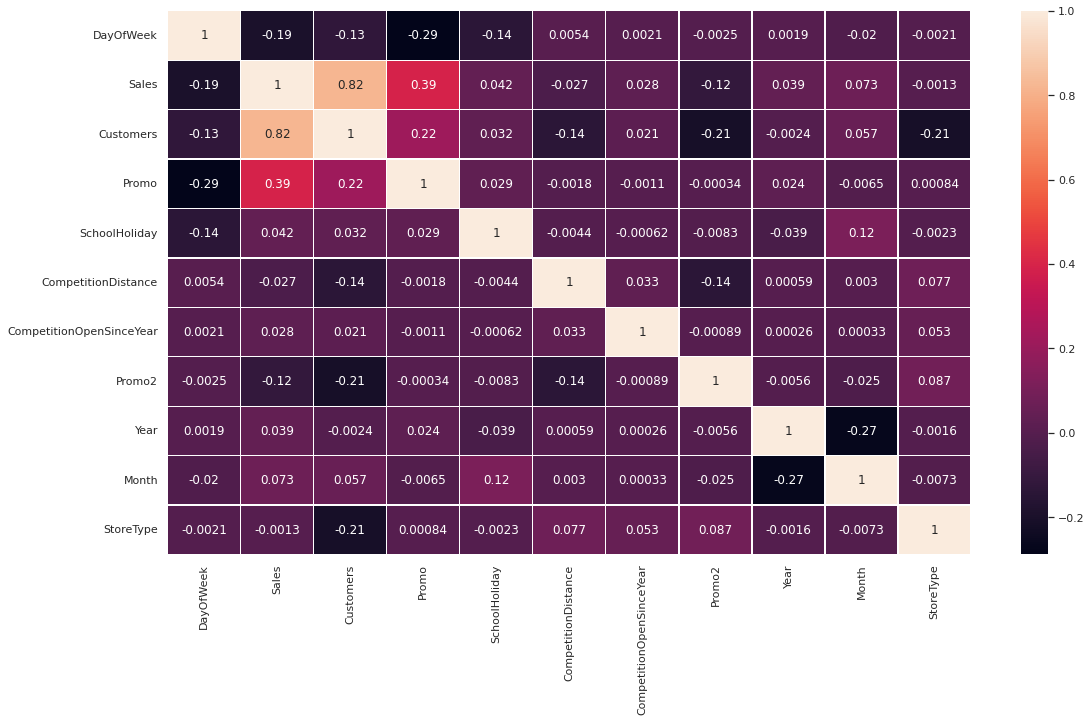

In [186]:

# Heat Map
plt.figure(figsize=(18,10))
select_df.corr(method ='pearson')
sns.heatmap(corrl, annot=True, linewidths=0.2)

**Conslusion**

* Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model.

#Buliding a Regression Model

In [187]:
from sklearn import metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

In [191]:
#Fitting the linear model
x=select_df.drop(['Sales'],axis=1)
y=select_df['Sales']

**Train Test Split**

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [193]:
#For Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
DayOfWeek,-50.338901
Customers,7.257032
Promo,1166.824428
SchoolHoliday,25.162977
CompetitionDistance,0.028960
CompetitionOpenSinceYear,-0.824714
Promo2,340.544195
Year,179.297277
Month,17.021181
Week_Number,4.356054


In [194]:
pred = lin_reg.predict(X_test)
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 997.6632545831256
MSE: 1956616.8773036068
RMSE: 1398.7912200552328
R2 Square 0.7651894257971061
__________________________________
Train set evaluation:
_____________________________________
MAE: 995.9739722266974
MSE: 1948472.5270451566
RMSE: 1395.8769741797294
R2 Square 0.7662076551456334
__________________________________


##2. Mean of Residuals

* Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [195]:
#Finding mean of Residuals
residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.4943381166332366e-11


###**Note:**-Very close to zero so all good here.

###**3. Check for Normality of error terms/residuals**

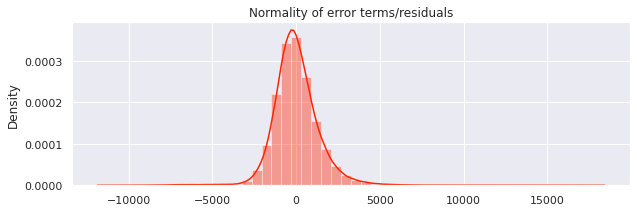

In [196]:
#Distplot for Normality of error terms/residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.**

**Conclusion:-**

* Over Data is as such that our Linear model is not able to performe well in it.
* Apply cross validation and check different accuracy.

###**CROSS VALIDATION**
**As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split.** 
* For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy. Cross Validation (CV)

* K folds = K fold CV.

* When K is increase, computationally cost is increase

* cross_val_score(LR_model,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)


In [198]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5



cv_result = cross_val_score(lin_reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.79185952 0.74952399 0.81022022 0.74878595 0.71272546]
CV scores average:  0.7626230281686598


##Regularized Regression with Hyper parameter Tunning.
**As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.**

**Ridge regression: First regularization technique. Also it is called L2 regularization.**

* Ridge regression lost fuction = OLS + alpha * sum(parameter^2) alpha is parameter we need to choose to fit and predict. alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
* What if alpha is zero? lost function = OLS so that is linear rigression
If alpha is small that can cause overfitting
If alpha is big that can cause underfitting.

**Lasso regression: Second regularization technique. Also it is called L1 regularization.**
* Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression

##Lasso Regression
**Models Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par**



In [199]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score




lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)


Test set evaluation:
_____________________________________
MAE: 997.6639919421563
MSE: 1956617.4577002225
RMSE: 1398.79142751885
R2 Square 0.7651893561446033
__________________________________
Train set evaluation:
_____________________________________
MAE: 995.974472417511
MSE: 1948472.5682844475
RMSE: 1395.8769889515506
R2 Square 0.766207650197434
__________________________________
The best fit alpha value is found out to be : {'alpha': 1e-08}


##Ridge Regression

In [201]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 997.6632544537556
MSE: 1956616.8773070285
RMSE: 1398.7912200564558
R2 Square 0.7651894257966955
__________________________________
Train set evaluation:
_____________________________________
MAE: 995.9739721069957
MSE: 1948472.5270451566
RMSE: 1395.8769741797294
R2 Square 0.7662076551456334
__________________________________


#**Decision Tree Regressor**

In [202]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [203]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 479.8389978648255
MSE: 534546.1580298526
RMSE: 731.1266361102245
R2 Square 0.9358499398830116
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.021488033031671887
MSE: 11.843830763994246
RMSE: 3.4414867083855265
R2 Square 0.9999985788883713
__________________________________


**Observation:-** The decision tree regressor performing well compared to Linear

#**Random Forest Regressor**

In [204]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50]},
             return_train_score=True)

#Interpreting the important features

In [205]:
# features used
columns = list(X_train.columns)
columns

['DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Year',
 'Month',
 'Week_Number',
 'StoreType']

In [206]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.best_estimator_.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
1,Customers,0.718023
4,CompetitionDistance,0.096958
10,StoreType,0.069600
2,Promo,0.041916
5,CompetitionOpenSinceYear,0.028957
0,DayOfWeek,0.013715
9,Week_Number,0.010748
6,Promo2,0.010214
7,Year,0.004462
8,Month,0.003942


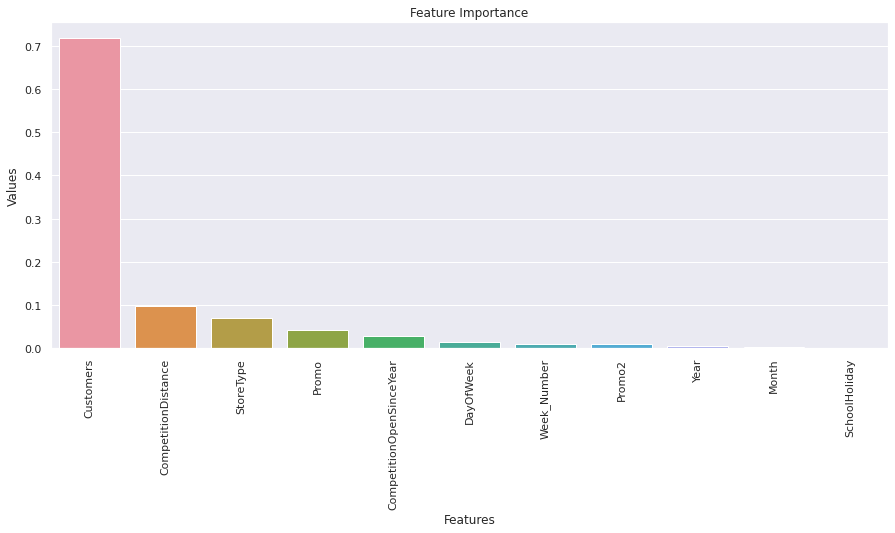

In [207]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

In [209]:
LR=round(lin_reg.score(X_train,y_train)*100,2)

Rg=round(ridge.score(X_train,y_train)*100,2)
# Elas=round(Elastic.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)
Rf=round(random_forest_model.score(X_train,y_train)*100,2)

In [210]:
from sklearn import metrics
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
ls2

76.62

In [211]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression','Ridge_Regression',
              'Elastic_Net', 'Desicion-Tree_Regression', 'Random_Forest'],
    'Score': [LR,ls2,Rg,Elas,Dt,Rf]})
#models.sort_values(by='Score')
#models
models.sort_values(by='Score',ascending=False)
#df=pd.DataFrame(models)

NameError: ignored